# Introduction to Pandas and matplotlib

In this notebook, you'll be going over how to create some really cool vizualizations using a new libray, 'Pandas'. 

Pandas is a popular open-source data manipulation and analysis library for the Python programming language. It provides easy-to-use data structures and data analysis tools, making it a powerful tool for working with structured data.

The key data structures in Pandas are the `Series` and `DataFrame`. A `Series` is a one-dimensional array-like object that can hold any data type, while a `DataFrame` is a two-dimensional tabular data structure consisting of rows and columns, similar to a spreadsheet or a SQL table. These data structures are designed to handle large and complex datasets efficiently.

Pandas allows you to perform a wide range of operations on data, such as filtering, sorting, merging, reshaping, and aggregating. It provides methods for data cleaning, data exploration, data visualization, and handling missing or duplicate values. Pandas also integrates well with other libraries in the scientific Python ecosystem, such as NumPy, Matplotlib, and scikit-learn, enabling seamless data analysis workflows.

With its intuitive and powerful functionality, Pandas has become a popular choice for data manipulation and analysis tasks in various domains, including data science, finance, economics, social sciences, and more.

**This notebook is intended to serve as a guide to pandas and you wouldn't be required to write any code. Just follow through the questions and comments included carefully!**

We introduced the packages, matplotlib and pandas in notebook1. In this notebook, we are going to explore these packages in depth. 

<img src = "nb1ss.png" align="center" width = 600 />

In [3]:
# Breakdown of commonly used packages:

#Used for visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Numberical computation
import numpy as np
from numpy import NaN
from decimal import Decimal

#Manuplating data in form of series or dataframes
import pandas as pd

#To manuplate fields that are date or time
import datetime
from datetime import time

### Introduction to Pandas

We'll be using the following slides from Data 100, a course offered at Berkeley, as a overview. 

Pandas 1:
https://docs.google.com/presentation/d/1SAbDTM2aaIjA2Hsupd_uCXV2mpFX5oBYvmRqpLgFJYk/edit#slide=id.g1d1eab55d83_0_0

Pandas 2:
https://docs.google.com/presentation/d/1kHsp7lVCQsAlf-gVL8SySrkp9g7lIITXE-CvSs2Ww8o/edit

In [4]:
# Using this cell, we will be defining some matplotlib parameters for the plots that we would be creating. 

matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 20
plt.rcParams['figure.figsize'] = [20, 14]
plt.rcParams["axes.labelweight"] = "bold"
np.set_printoptions(suppress=True)
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["savefig.facecolor"]= '#FFFFFF'

Now for analysis, we will be observing the Northern hemisphere cycle. We will try to answer the following questions; what is a part of this cycle? What is everything displayed in the data that is not part of the cycle? 

For temperate areas in the northern hemisphere, spring begins on 1 March, summer on 1 June, autumn on 1 September, and winter on 1 December. For the southern hemisphere temperate zone, spring begins on 1 September, summer on 1 December, autumn on 1 March, and winter on 1 June. The Northern Hemisphere has more CO2 because the northern hemisphere contains much more land than the southern hemisphere – which is mostly covered by ocean – the amount of carbon dioxide in the atmosphere increases overall during the northern winter

**Part A:**
**First let's look at the CO2 daily profiles from a single BEACO2N node for winter and summer:**

In [ ]:
# Pulling in data from a beacon node, NOTE: you can change the dates in the "start=" and "end=" sections of the url.
filename ="http://128.32.208.8/node/81/measurements_all/csv?name=Beverly%20Hills%20Elementary%20School&interval=60&variables=co2_corrected_avg_t_drift_applied&start=2021-01-01%2000:00:00&end=2021-12-31%2000:00:00&chart_type=measurement"

# Once you have a defined filename, we will use the .read_csv function to save the node information in a dataframe called 'data'
data  = pd.read_csv(filename, on_bad_lines = 'skip') 


In [ ]:
# The following code cells
data['timestamp'] = pd.to_datetime(data['local_timestamp'],format ='%Y-%m-%d  %H:%M:%S')
data.index = data['timestamp']
data = data.drop(['local_timestamp','epoch','datetime','node_id','node_file_id','timestamp'],axis = 1)
data[:10]

In [4]:
#Adding a month column
data['month'] = data.index.month
data.head(5)

,co2_corrected_avg_t_drift_applied,month
timestamp,,
2021-01-01 00:00:00,456.227262,1
2021-01-01 01:00:00,456.186365,1
2021-01-01 02:00:00,446.983148,1
2021-01-01 03:00:00,453.625894,1
2021-01-01 04:00:00,472.004782,1


In [5]:
#Selecting January and July dates for winter and summer using the boolean indexing method
jan_data = data[data['month'] == 1]
jul_data = data[data['month'] == 7]

In [6]:
#Taking the mean across each hour
jan_co2_grouped = jan_data.groupby(jan_data.index.hour).mean()
jul_co2_grouped = jul_data.groupby(jul_data.index.hour).mean()

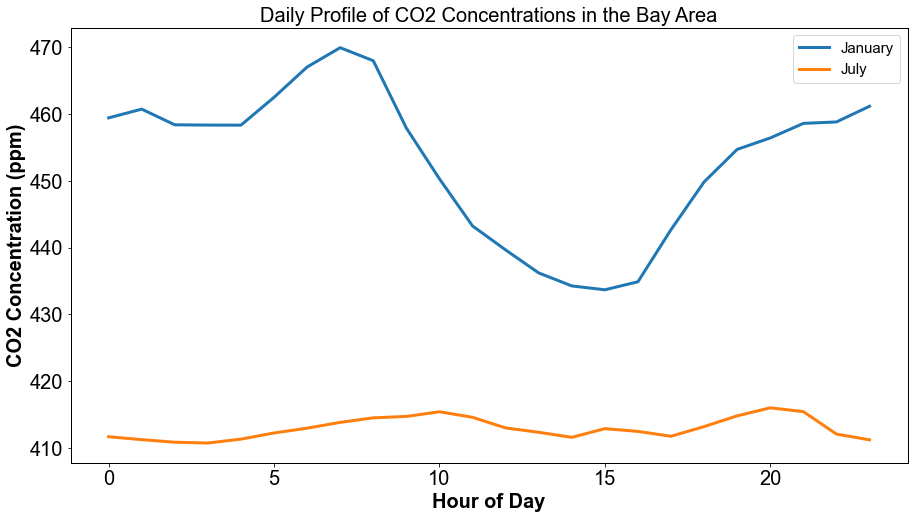

In [7]:
plt.figure(figsize = (15, 8))
plt.plot(jan_co2_grouped.index, jan_co2_grouped['co2_corrected_avg_t_drift_applied'], label = 'January')
plt.plot(jul_co2_grouped.index, jul_co2_grouped['co2_corrected_avg_t_drift_applied'], label = 'July')
plt.xlabel("Hour of Day")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("Daily Profile of CO2 Concentrations in the Bay Area")
plt.legend(fontsize = 15)

**Part B: The CO2 background concentration in the atmosphere has a seasonal cycle.**

The "Keeling Curve" refers to a graph that shows the ongoing increase of carbon dioxide (CO2) levels in the Earth's atmosphere over time. It is named after Charles David Keeling, an American scientist who began measurements of atmospheric CO2 concentrations at the Mauna Loa Observatory in Hawaii in 1958.

The Keeling Curve is a significant tool in studying the long-term trend of CO2 concentrations and its correlation with climate change. It shows a consistent upward trend with seasonal variations, reflecting the influence of natural processes such as photosynthesis in the Northern Hemisphere during the summer months. However, the overall trend demonstrates a steady rise in CO2 levels, primarily attributed to human activities like the burning of fossil fuels and deforestation.

Let's pull data from multiple BEACO2N sites to find the background CO2 concentration in the Bay Area.


In [8]:
#This function will pull in the beacon data from all the node IDs listed
def co2(start,end,*nodes):
    full = pd.DataFrame()
    for node in nodes:
        print(node)
        parameter = 'co2_corrected_avg_t_drift_applied-level-2'
        filename="http://128.32.208.8/node/"+node+"/measurements_all/csv?name=Supersite&interval=60&variables="+parameter+"&start="+start+"&end="+end
        data  = pd.read_csv(filename, on_bad_lines="skip",index_col=[0], parse_dates=[0]) 
        data = data.rename(columns={parameter:node})
        data = data.drop(['epoch','node_id','node_file_id','datetime'],axis = 1)
        full = pd.merge(full,data, how = 'outer',left_index=True,right_index=True) 
    return full

In [9]:
#Getting the 2021 CO2 data from several BEACO2N sites
CO2_vals = co2('2021-01-01%2000:00:00','2021-12-31%2000:00:00','41','45','47','63','81', '26', '21', '25', '11', '78', '57')

41
45
47
63
81
26
21
25
11
78
57


In [10]:
#Replacing flagged values with NANs
CO2_vals = CO2_vals.replace({-999.00000:np.NaN})
CO2_vals = CO2_vals.replace({-111.00000:np.NaN})

In [11]:
CO2_vals.head(5)

,41,45,47,63,81,26,21,25,11,78,57
local_timestamp,,,,,,,,,,,
2021-01-01 00:00:00,456.017316,478.311917,472.661381,457.843508,456.227262,516.597320,455.384242,441.388594,474.153506,NaN,NaN
2021-01-01 01:00:00,503.171393,489.185970,470.553559,461.186613,456.186365,486.342687,466.203537,445.640017,476.921038,NaN,NaN
2021-01-01 02:00:00,497.273704,508.522232,464.533862,456.277776,446.983148,465.720543,494.167596,447.144204,472.313633,NaN,NaN
2021-01-01 03:00:00,503.214112,509.771089,479.929985,472.331156,453.625894,498.277757,469.978429,442.265893,476.724706,NaN,NaN
2021-01-01 04:00:00,499.710018,505.091756,474.502803,473.563219,472.004782,512.201767,490.993720,449.445706,466.343059,NaN,NaN


In [12]:
#To get an idea of the background concentration, let's pull the 5th percentile of these measurements at every time step
CO2_vals['fifth_per'] = CO2_vals.quantile(q=0.05,axis=1,numeric_only=True, interpolation='linear')
CO2_vals.head(5)

,41,45,47,63,81,26,21,25,11,78,57,fifth_per
local_timestamp,,,,,,,,,,,,
2021-01-01 00:00:00,456.017316,478.311917,472.661381,457.843508,456.227262,516.597320,455.384242,441.388594,474.153506,NaN,NaN,446.986854
2021-01-01 01:00:00,503.171393,489.185970,470.553559,461.186613,456.186365,486.342687,466.203537,445.640017,476.921038,NaN,NaN,449.858556
2021-01-01 02:00:00,497.273704,508.522232,464.533862,456.277776,446.983148,465.720543,494.167596,447.144204,472.313633,NaN,NaN,447.047571
2021-01-01 03:00:00,503.214112,509.771089,479.929985,472.331156,453.625894,498.277757,469.978429,442.265893,476.724706,NaN,NaN,446.809893
2021-01-01 04:00:00,499.710018,505.091756,474.502803,473.563219,472.004782,512.201767,490.993720,449.445706,466.343059,NaN,NaN,456.204648


In [13]:
#As we saw above, CO2 concentrations are different at day and at night. Let's pull just the daytime hours
CO2_vals['hour'] = CO2_vals.index.time
CO2_vals_filtered = CO2_vals.loc[(CO2_vals['hour'] >= time(10,00)) & (CO2_vals['hour'] <= time(16,00))]
CO2_vals_filtered = CO2_vals_filtered.drop('hour', axis = 1)

Text(0.5, 1.0, '5th Percentile of BEACO2N Daytime CO2 Measurements')

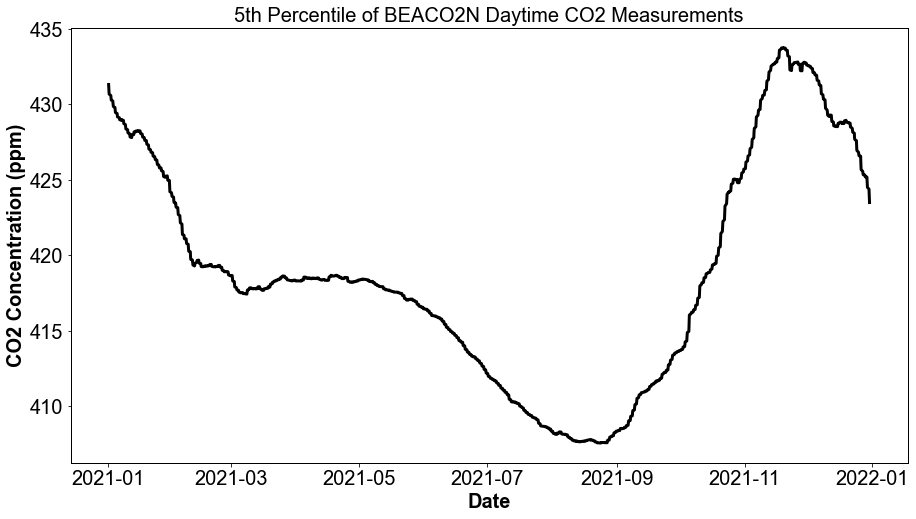

In [14]:
#Let's plot the 5th percentile and take a rolling mean to smooth it out to get an idea of the background
plt.figure(figsize = (15, 8))
plt.plot(CO2_vals_filtered['fifth_per'].rolling(window = 24*14, min_periods = 24*6, center = True).mean(), color = 'black', label = "5th Percentile")
plt.xlabel("Date")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("5th Percentile of BEACO2N Daytime CO2 Measurements")

**Observations:** The background CO2 concentration tends to be lower in the spring and summer due to the seasonal cycle of vegetation growth and decay, particularly in the Northern Hemisphere. This phenomenon is known as the "CO2 fertilization effect."

During spring and summer, plants undergo photosynthesis, a process in which they absorb carbon dioxide from the atmosphere and convert it into carbohydrates and oxygen. This increased photosynthetic activity leads to a reduction in atmospheric CO2 levels. As a result, the background CO2 concentration decreases during these seasons.

In the Northern Hemisphere, where a majority of the Earth's landmass is located, the seasonal cycle of vegetation growth and decay is more pronounced. This is because the landmasses in the Northern Hemisphere have a higher ratio of land to ocean compared to the Southern Hemisphere. Consequently, the effect of photosynthesis and the resulting decrease in CO2 levels are more prominent in the Northern Hemisphere during spring and summer.

It's worth noting that even with the decrease in background CO2 levels during spring and summer, the overall trend of increasing CO2 concentrations, as shown by the Keeling Curve, continues due to the cumulative effect of human activities releasing carbon dioxide into the atmosphere.